# 11 Stack Basics

data elemenet를 보관할 수 있는 선형 구조인데, LIFO를 따름. 

넣는 것을 push 연산, 빼는 것을 pop 연산이라 부름. 

스택에서 두 가지 오류가 발생할 수 있다. 
- Stack Underflow: 없는데 꺼낼려고 할 때. 
- Stack Overflow: 꽉 찼는데 더 넣으려고 할 때. 

연산의 정의
- `size()`: 현재 스택에 들어있는 데이터 원소의 수를 구함. 
- `isEmpty()`: 현재 스택이 비어있는지 판단. 
- `push(x)`: 데이터 원소 x를 스택에 추가. 
- `pop()`: 스택의 맨 위에 저장된 데이터 원소를 제거, 그리고 반환. 
- `peek()`: 스택의 맨 위에 저장된 데이터 원소를 반환. 제거하지 않음. 

파이썬 리스트를 활용하여 만들 경우

In [1]:
class ArrayStack:
    
    def size(self):
        return len(self.data)
    
    def isEmpty(self):
        return self.size()
    
    def push(self, item):
        self.data.append(item)
        
    def pop(self):
        return self.data.pop()
    
    def peek(self):
        return self.data[-1]

기존에 만든 모듈을 import하여 할 수도 있다. 

In [2]:
# from doublylinkedlist import Node
# from doublylinkedlist import DoublyLinkedList

class LinkedListStack:

	def __init__(self):
		self.data = DoublyLinkedList()

	def size(self):
		return self.data.getLength()

	def isEmpty(self):
		return self.size() == 0

	def push(self, item):
		node = Node(item)
		self.data.insertAt(self.size() + 1, node)

	def pop(self):
		return self.data.popAt(self.size())

	def peek(self):
		return self.data.getAt(self.size()).data

Stack은 이미 파이썬에 builtin으로 구현되어있다. 

이 라이브러리를 갖다 쓰자.

In [3]:
from pythonds.basic.stack import Stack

ModuleNotFoundError: No module named 'pythonds'

근데 이 `pythonds`라는건 깔려있지 않다. 

built-in인 `deque`로 구현 가능하다. 

queue, stack 모두 이걸로 구현한다. 

In [5]:
from collections import deque

In [8]:
data = deque()

In [9]:
data.appendleft(1)
data.appendleft(2)
data.appendleft(3)
data

deque([3, 2, 1])

In [11]:
data.popleft()

3

In [12]:
data

deque([2, 1])

In [13]:
dir(data)

['__add__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'appendleft',
 'clear',
 'copy',
 'count',
 'extend',
 'extendleft',
 'index',
 'insert',
 'maxlen',
 'pop',
 'popleft',
 'remove',
 'reverse',
 'rotate']

연습문제: 수식의 괄호 유효성 검사

stack이용해 풀기 

# 12 수식의 후위 표기법

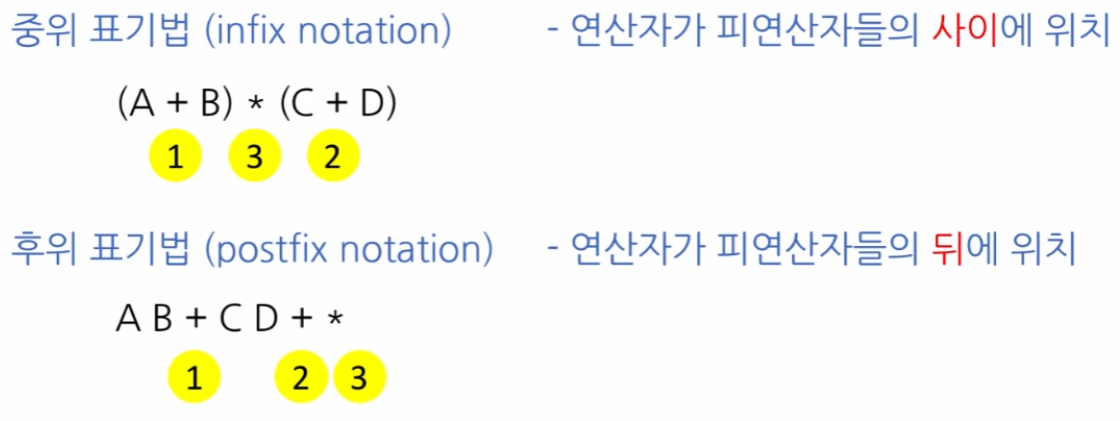

postfix notation에서는 순서대로 계산되기에 괄호도 필요 없다. 

중위 표현식을 후위 표현식으로 변환할 때 연산자에 우선순위가 있으므로 후위표현식을 만들 때 우선순위를 따져서 더 우선순위 높은 연산자가 stack에 들어있으면 pop해서 붙여주고, 아니라면 계속 stack에 쌓다가 마지막에 다 pop해서 뒤에 붙여준다. 동일 우선순위일 때는 pop하고 push한다. 

괄호의 경우, 여는 괄호 `(` 의 우선순위를 가장 낮게 설정하면 된다. `(`는 후위표현식에서 필요하지 않으므로 stack에 쌓을 때만 사용하고 후위표현식에서는 빼줘도 된다. 

즉 우선순위는 `(` < `+` < `*` or `/`

In [1]:
priority_d = {
    '*': 3, '/': 3,
    '+': 2, '-': 2,
    '(': 1,
}

알고리즘:

- 중위 표현식을 왼쪽부터 하나씩 읽어서
    - 피연산자이면 그냥 출력
    - `(` 이면 스택에 push
    - `)`이면 `)`이 나올 때 까지 스택에서 pop, 출력
    - 연산자면 스택에서 이보다 높거나 같은 우선순위인 것들을 pop, 출력
        - 그리고 이 연산자는 스택에 push
- 스택에 남아있는 연산자는 모두 pop, 출력

구현 시, 스택의 맨 위의 연산자와 우선순위 비교할 때 꺼내지 않고 확인만 하기 위해 `peek()`을 사용

스택에 남아있는 연산자 모두 `pop()` 하는 순환문. `isEmpty()`를 통해 비었는지 check하면서 순환한다. 

#### 연습문제: 중위표현식을 후위표현식으로 바꾸기

In [6]:
class ArrayStack:

    def __init__(self):
        self.data = []

    def size(self):
        return len(self.data)

    def isEmpty(self):
        return self.size() == 0

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

    def peek(self):
        return self.data[-1]

In [32]:
prec = {
    '*': 3, '/': 3,
    '+': 2, '-': 2,
    '(': 1
}

def solution(S):
    opStack = ArrayStack()
    answer = ''
    
    for s in S:
        if s not in prec.keys() and s != ')':
            answer += s
        else:
            if s == ')':
                while opStack.peek() != '(':
                    answer += opStack.pop()
                else:
                    opStack.pop()
            else:
                if opStack.isEmpty():
                    opStack.push(s)
                else:
                    p = opStack.peek()
                    
                    while prec[p] >= prec[s]:
                        
                        if s == '(':
                            opStack.push(s)
                            break
                        
                        answer += opStack.pop()
                        if opStack.isEmpty():
                            opStack.push(s)
                            break
                        else:
                            p = opStack.peek()
                    else:
                        opStack.push(s)
        
    
    while not opStack.isEmpty():
        answer += opStack.pop()
        
    return answer

In [33]:
case_l = [
    '(A+B)*(C+D)',
    'A*B+C',
    'A+B*C+D',
    '(A+B)*C',
    'A*(B+C)',
]

In [34]:
for S in case_l:
    print(solution(S))
    print('----'*5)

AB+CD+*
--------------------
AB*C+
--------------------
ABC*+D+
--------------------
AB+C*
--------------------
ABC+*
--------------------


만약 대괄호와 중괄호까지 확장된다면 어떻게 처리하는 것이 좋을까? 

사실 괄호에 굳이 우선순위라는 것 자체를 부여할 필요가 없어보인다. 

어차피 괄호는 쌓고 나중에 해소해야 할 부분이 아닌가? 

괄호에 우선순위가 필요하다면 그건 수식의 유효성을 검증할 때나 필요할 것이다. 대괄호 다음 반드시 중괄호가 오고 반드시 그 다음 소괄호가 오는 식으로 만들어야 하기 때문이다. 

수식이 무결하다고 가정할 때, 수식에 우선순위를 부여하지 않고 스택으로 구현해보자. 

In [58]:
prec = {
    '*': 3, '/': 3,
    '+': 2, '-': 2,
}

bracket1_s = {'(', '{', '['}
bracket2_s = {')', '}', ']'}

def solution(S):
    opStack = ArrayStack()
    answer = ''
    
    for s in S:
        if (s not in prec) and (s not in bracket1_s) and (s not in bracket2_s):
            answer += s
            continue
        
        if s in bracket1_s:
            opStack.push(s)
        elif s in prec:
            if opStack.isEmpty():
                opStack.push(s)
            else:
                p = opStack.peek()
                
                if p in bracket1_s:
                    opStack.push(s)
                else:
                    while (p in prec) and (prec[p] >= prec[s]):
                        answer += opStack.pop()
                        
                        if opStack.isEmpty():
                            opStack.push(s)
                            break
                        
                        p = opStack.peek()
                    else:
                        opStack.push(s)
        elif s in bracket2_s:
            p = opStack.peek()
            
            while p not in bracket1_s:
                answer += opStack.pop()
                p = opStack.peek()
            else:
                opStack.pop()
    
    while not opStack.isEmpty():
        answer += opStack.pop()
        
    return answer

In [71]:
case_l = [
    '(A*B)+C',
    'A+(B*C+D)',
    '{(A+B)*C}',
    'A*(B+C)',
    '(A+B)*{(C+D)}',
    '(A+B)+C*D/{E*(F+G)}'
]

In [72]:
for S in case_l:
    print(solution(S))
    print('----'*5)

AB*C+
--------------------
ABC*D++
--------------------
AB+C*
--------------------
ABC+*
--------------------
AB+CD+*
--------------------
AB+CD*EFG+*/+
--------------------


# 13 후위 표기 수식 계산

이번엔 거꾸로 숫자들을 stack에 넣고 연산자를 만날 때마다 꺼내서 계산하고 다시 stack에 넣으면 된다. 

주의할 것은 두 개 이상 있어야 계산할 수 있다는 것이고, 무엇보다 `-` 나 `/` 같은 것은 교환법칙이 성립하지 않기 때문에 순서가 중요하다는 것이다. 

#### 연습문제: 후위표현식 계산. 

In [6]:
class ArrayStack:

    def __init__(self):
        self.data = []

    def size(self):
        return len(self.data)

    def isEmpty(self):
        return self.size() == 0

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

    def peek(self):
        return self.data[-1]


def splitTokens(exprStr):
    tokens = []
    val = 0
    valProcessing = False
    for c in exprStr:
        if c == ' ':
            continue
        if c in '0123456789':
            val = val * 10 + int(c)
            valProcessing = True
        else:
            if valProcessing:
                tokens.append(val)
                val = 0
            valProcessing = False
            tokens.append(c)
    if valProcessing:
        tokens.append(val)

    return tokens


def infixToPostfix(tokenList):
    prec = {
        '*': 3,
        '/': 3,
        '+': 2,
        '-': 2,
        '(': 1,
    }

    opStack = ArrayStack()
    postfixList = []
    
    for s in tokenList:
        if isinstance(s, int):
            postfixList.append(s)
            continue
        
        if opStack.isEmpty():
            opStack.push(s)
        else:
            if s in prec:
                if s == '(':
                    opStack.push(s)
                else:
                    p = opStack.peek()
                    
                    while prec[p] >= prec[s]:
                        postfixList.append(opStack.pop())
                        
                        if opStack.isEmpty():
                            opStack.push(s)
                            break
                        
                        p = opStack.peek()
                    else:
                        opStack.push(s)
            
            elif s == ')':
                p = opStack.peek()
                
                while p != '(':
                    postfixList.append(opStack.pop())
                    p = opStack.peek()
                else:
                    opStack.pop()
    
    while not opStack.isEmpty():
        postfixList.append(opStack.pop())
    
    return postfixList


def postfixEval(tokenList):
    operand_stack = ArrayStack()
    
    op_func_d = {
        '*': lambda x, y: x*y,
        '/': lambda x, y: x/y, 
        '+': lambda x, y: x+y,
        '-': lambda x, y: x-y
    }
    
    for token in tokenList:
        if isinstance(token, int):
            operand_stack.push(token)
        else:
            first = operand_stack.pop()
            second = operand_stack.pop()
            
            temp = op_func_d[token](second, first)
            operand_stack.push(temp)
    
    value = operand_stack.pop()
    
    return value


def solution(expr):
    tokens = splitTokens(expr)
    postfix = infixToPostfix(tokens)
    val = postfixEval(postfix)
    return val

In [7]:
case_l = [
    '5 + 3', 
    '(1 + 2) * (3 + 4)',
    '7 * (9 - (3+2))'
]

In [8]:
for case in case_l:
    print(solution(case))

8
21
28


위에서 분기를 dictionary를 이용해 더 효율적으로 할 수 있도록 하였다. 

그리고 역시 `(`는 볼 필요도 없이 push하면 되니까 굳이 우선순위를 따지지 않아도 된다. 